# Resizing DBM Dataset Images

### Mounting drive to upload files from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


### Importing the required libraries for the code

In [ ]:
import os
import xml.etree
import numpy as np
from numpy import zeros, asarray

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### Uploading DBM dataset file (with images and XML files) and visualize & utils Python files

In [ ]:
!pip install mrcnn
import mrcnn

!unzip "//gdrive//My Drive//DBM Mask RCNN//Updated New Data resized images.zip"
!cp "/gdrive/My Drive/DBM Mask RCNN/utils.py" "utils.py"
!cp "/gdrive/My Drive/DBM Mask RCNN/visualize.py" "visualize.py"

import utils
import visualize

     |████████████████████████████████| 51 kB 337 kB/s 
  Created wheel for mrcnn: filename=mrcnn-0.2-py3-none-any.whl size=54931 sha256=34fd0f6d68bad8144d8703a3bb32b485aff38ca38a089f76fbe51a54f281d659
  Stored in directory: /root/.cache/pip/wheels/1d/94/0d/03ff96abc43d2d6c8299a92cbb4eced2a1eda3ca7911c19427
Successfully built mrcnn
Archive:  //gdrive//My Drive//DBM Mask RCNN//Updated New Data resized images.zip
   creating: Updated New Data resized images/annots/
  inflating: Updated New Data resized images/annots/1.xml  
  inflating: Updated New Data resized images/annots/10.xml  
  inflating: Updated New Data resized images/annots/100.xml  
  inflating: Updated New Data resized images/annots/101.xml  
  inflating: Updated New Data resized images/annots/102.xml  
  inflating: Updated New Data resized images/annots/103.xml  
  inflating: Updated New Data resized images/annots/104.xml  
  inflating: Updated New Data resized images/annots/105.xml  
  inflating: Updated New Data resized i

### DBM Dataset

In [ ]:
class DBMDataset(utils.Dataset):

  def load_dataset(self, dataset_dir):
    self.add_class("dataset", 1, "DBM")
    
    images_dir = dataset_dir + '//images//'
    annotations_dir = dataset_dir + '//annots//'
    
    for filename in os.listdir(images_dir):
      image_id = filename.split('.')[0]

      img_path = images_dir + filename
      ann_path = annotations_dir + image_id + '.xml'
      
      self.add_image('dataset', image_id = image_id, path = img_path, annotation = ann_path)

  def extract_boxes(self, filename):
    tree = xml.etree.ElementTree.parse(filename)
    root = tree.getroot()
    
    boxes = list()
    for box in root.findall('.//bndbox'):
      xmin = int(box.find('xmin').text)
      ymin = int(box.find('ymin').text)
      xmax = int(box.find('xmax').text)
      ymax = int(box.find('ymax').text)
      coors = [xmin, ymin, xmax, ymax]
      boxes.append(coors)
    
    width = int(root.find('.//size/width').text)
    height = int(root.find('.//size/height').text)
    return boxes, width, height
    
  def load_mask(self, image_id):
    info = self.image_info[image_id]
    #print(info)
    path = info['annotation']
    #print(path)
    boxes, w, h = self.extract_boxes(path)
    masks = zeros([h, w, len(boxes)], dtype = 'uint8')

    class_ids = list()
    for i in range(len(boxes)):
      box = boxes[i]
      row_s, row_e = box[1], box[3]
      col_s, col_e = box[0], box[2]
      masks[row_s:row_e, col_s:col_e, i] = 1
      class_ids.append(self.class_names.index('DBM'))
    return masks, asarray(class_ids, dtype = 'int32')

### Prepare the dataset with all the images

In [ ]:
dataset = DBMDataset()
dataset.load_dataset(dataset_dir = 'Updated New Data resized images')
dataset.prepare()

### Importing libraries needed for the code below

In [ ]:
import statistics
from pathlib import Path
import xml.etree.ElementTree as ET
from PIL import Image
import matplotlib.pyplot as plt

### Resize the images and save the generated images and XML files

In [ ]:
num_bbox_list = []

In [ ]:
for image_id in dataset.image_ids:
  print("image_id:", image_id)
  info = dataset.image_info[image_id]
  #print("image_number:", info["id"])

  image = dataset.load_image(image_id)
  #plt.figure()
  #plt.imshow(image)
  #plt.show()

  mask, class_ids = dataset.load_mask(int(image_id))
  bbox = utils.extract_bboxes(mask)

  num_bbox_list.append(len(bbox))
  #print(len(bbox))

image_id: 0
image_id: 1
image_id: 2
image_id: 3
image_id: 4
image_id: 5
image_id: 6
image_id: 7
image_id: 8
image_id: 9
image_id: 10
image_id: 11
image_id: 12
image_id: 13
image_id: 14
image_id: 15
image_id: 16
image_id: 17
image_id: 18
image_id: 19
image_id: 20
image_id: 21
image_id: 22
image_id: 23
image_id: 24
image_id: 25
image_id: 26
image_id: 27
image_id: 28
image_id: 29
image_id: 30
image_id: 31
image_id: 32
image_id: 33
image_id: 34
image_id: 35
image_id: 36
image_id: 37
image_id: 38
image_id: 39
image_id: 40
image_id: 41
image_id: 42
image_id: 43
image_id: 44
image_id: 45
image_id: 46
image_id: 47
image_id: 48
image_id: 49
image_id: 50
image_id: 51
image_id: 52
image_id: 53
image_id: 54
image_id: 55
image_id: 56
image_id: 57
image_id: 58
image_id: 59
image_id: 60
image_id: 61
image_id: 62
image_id: 63
image_id: 64
image_id: 65
image_id: 66
image_id: 67
image_id: 68
image_id: 69
image_id: 70
image_id: 71
image_id: 72
image_id: 73
image_id: 74
image_id: 75
image_id: 76
image_id:

### Getting statistics about the length of bounding boxes

In [ ]:
print("num of bbox list:", num_bbox_list)

print("\nMean num of bbox:", np.mean(num_bbox_list))
print("Biggest num of bbox:", max(num_bbox_list))
print("Smallest num of bbox:", min(num_bbox_list))
print("Median num of bbox:", statistics.median(num_bbox_list))
print("Std Dev num of bbox:", np.std(num_bbox_list))

num of bbox list: [2, 12, 23, 31, 0, 0, 2, 1, 0, 0, 5, 2, 5, 2, 61, 1, 0, 11, 3, 3, 2, 29, 2, 4, 2, 6, 55, 7, 130, 16, 0, 1, 0, 18, 2, 8, 0, 5, 2, 0, 2, 0, 0, 11, 2, 9, 44, 21, 0, 12, 0, 15, 0, 0, 2, 23, 18, 1, 0, 0, 11, 0, 0, 0, 0, 1, 2, 27, 0, 5, 30, 3, 1, 58, 1, 3, 6, 12, 8, 4, 10, 0, 1, 1, 62, 8, 73, 19, 3, 1, 56, 52, 1, 7, 0, 11, 1, 205, 0, 0, 19, 39, 1, 4, 9, 1, 0, 47, 1, 49, 0, 0, 10, 1, 0, 7, 61, 0, 0, 38, 7, 2, 0, 0, 13, 0, 2, 0, 0, 54, 0, 2, 8, 30, 11, 7, 2, 4, 14, 6, 15, 20, 7, 55, 3, 0, 5, 3, 4, 37, 5, 3, 4, 12, 0, 2, 0, 2, 1, 4, 16, 5, 20, 7, 1, 1, 1, 0, 4, 0, 2, 0, 4, 9, 5, 2, 35, 0, 1, 32, 9, 0, 0, 20, 0, 4, 4, 3, 7, 56, 1, 0, 0, 0, 1, 8, 1, 0, 8, 1, 0, 0, 6, 0, 3, 0, 1, 7, 0, 5, 0, 0, 31, 2, 3, 105, 0, 20, 9, 4, 7, 1, 1, 37, 42, 868, 0, 2, 0, 6, 1, 15, 3, 0, 1, 0, 0, 13, 4, 8, 0, 2, 1, 1, 1, 2, 1, 11, 1, 0, 0, 18, 0, 13, 0, 2, 7, 1, 17, 10, 1, 0, 5, 0, 3, 22, 15, 2, 0, 0, 19, 18, 6, 1, 3, 3, 2, 3, 15, 0, 0, 0, 1, 0, 20, 6, 1, 434, 11, 1, 1, 0, 316, 1, 0, 0, 6, 1, 2, 0, 

In [ ]:
count_0 = 0
count_less_38 = 0
count_less_38_more_0 = 0
count_more_or_equal_38 = 0
count_more_48 = 0

num_bbox_list_less_38 = []
num_bbox_list_less_38_more_0 = []
num_bbox_list_more_or_equal_38 = []
num_bbox_list_more_48 = []

for num in num_bbox_list:

  if num == 0:
    count_0 += 1

  if num < 38 and num != 0:
    count_less_38_more_0 += 1
    num_bbox_list_less_38_more_0.append(num)

  if num < 38:
    count_less_38 += 1
    num_bbox_list_less_38.append(num)

  if num >= 38:
    count_more_or_equal_38 += 1
    num_bbox_list_more_or_equal_38.append(num)

  if num > 48:
    count_more_48 += 1
    num_bbox_list_more_48.append(num)

print("Total number of images:", len(num_bbox_list))
print("Number of images with 0 DBMs:", count_0, "(" + str((count_0/len(num_bbox_list))*100) + "%)")
print("Number of images with less than 38 DBMs but more than 0 DBMs:", count_less_38_more_0, "(" + str((count_less_38_more_0/len(num_bbox_list))*100) + "%)")
print("Number of images with less than 38 DBMs:", count_less_38, "(" + str((count_less_38/len(num_bbox_list))*100) + "%)")
print("Number of images with 38 or more DBMs:", count_more_or_equal_38, "(" + str((count_more_or_equal_38/len(num_bbox_list))*100) + "%)")
print("Number of images with more than 48 DBMs:", count_more_48, "(" + str((count_more_48/len(num_bbox_list))*100) + "%)")

Total number of images: 738
Number of images with 0 DBMs: 206 (27.91327913279133%)
Number of images with less than 38 DBMs but more than 0 DBMs: 469 (63.55013550135501%)
Number of images with less than 38 DBMs: 675 (91.46341463414635%)
Number of images with 38 or more DBMs: 63 (8.536585365853659%)
Number of images with more than 48 DBMs: 53 (7.181571815718158%)


### Plotting the deviation of the lengths

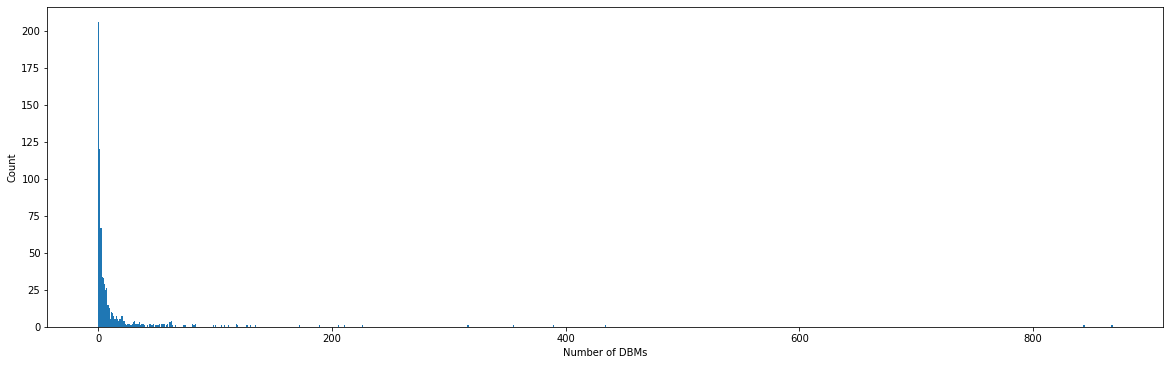

In [ ]:
plt.figure(figsize = (20, 20))
plt.subplot(3, 1, 1)
plt.hist(num_bbox_list, bins=max(num_bbox_list))
plt.xlabel("Number of DBMs")
plt.ylabel("Count")
plt.show()

In [ ]:
copy_num_bbox_list = num_bbox_list.copy()
copy_num_bbox_list.sort()
copy_num_bbox_list = copy_num_bbox_list[:-20]
print(max(copy_num_bbox_list))

100


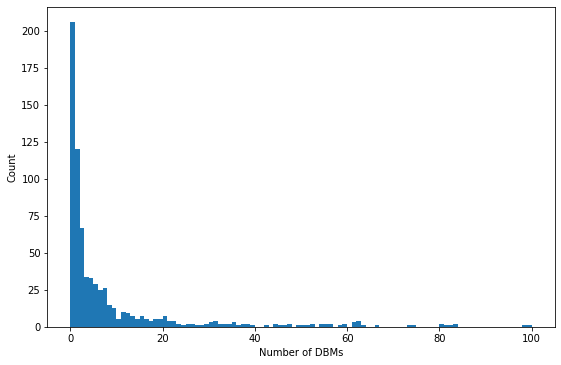

In [ ]:
plt.figure(figsize = (20, 20))
plt.subplot(3, 2, 1)
plt.hist(copy_num_bbox_list, bins=max(copy_num_bbox_list))
plt.xlabel("Number of DBMs")
plt.ylabel("Count")
plt.show()

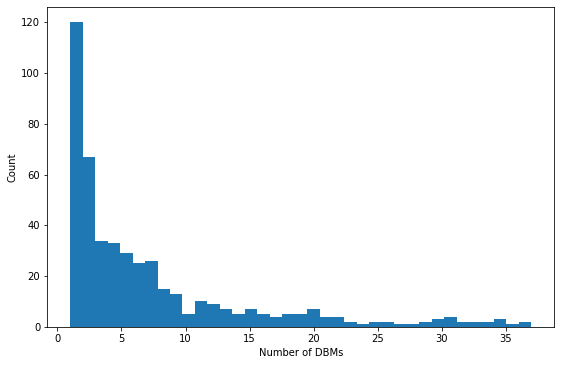

In [ ]:
plt.figure(figsize = (20, 20))
plt.subplot(3, 2, 1)
plt.hist(num_bbox_list_less_38_more_0, bins=max(num_bbox_list_less_38_more_0))
plt.xlabel("Number of DBMs")
plt.ylabel("Count")
plt.show()

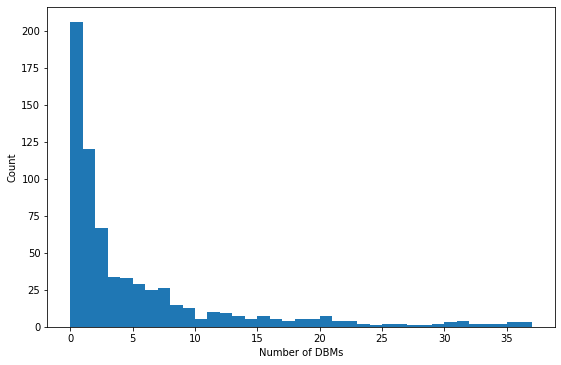

In [ ]:
plt.figure(figsize = (20, 20))
plt.subplot(3, 2, 1)
plt.hist(num_bbox_list_less_38, bins=max(num_bbox_list_less_38))
plt.xlabel("Number of DBMs")
plt.ylabel("Count")
plt.show()

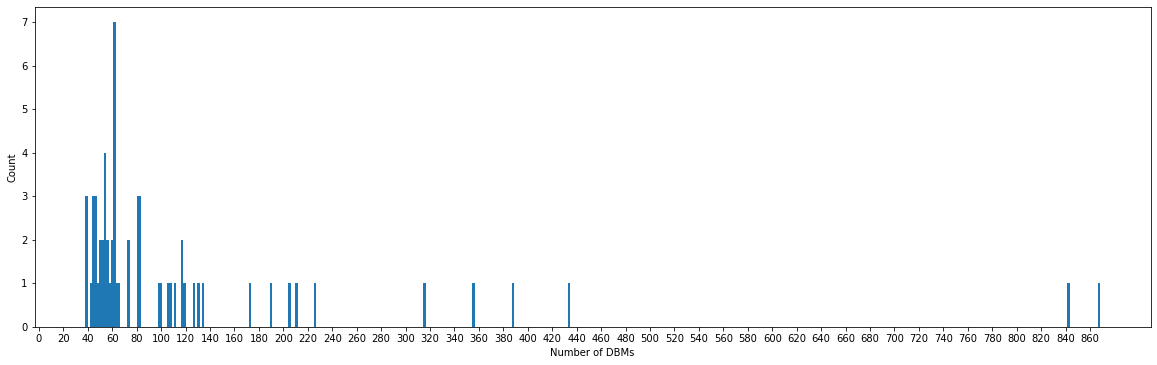

In [ ]:
plt.figure(figsize = (20, 20))
plt.subplot(3, 1, 1)
plt.hist(num_bbox_list_more_or_equal_38, bins=435)
plt.xlabel("Number of DBMs")
plt.ylabel("Count")
plt.xticks(np.arange(0, 870, 20))
plt.show()

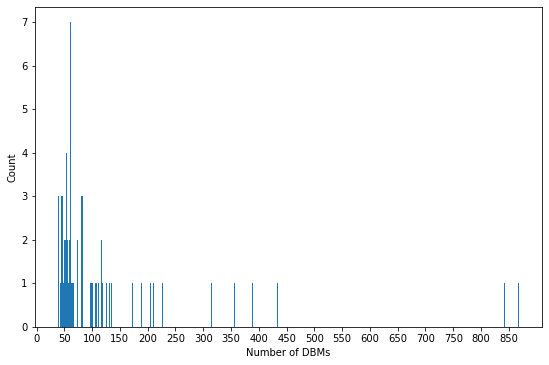

In [ ]:
plt.figure(figsize = (20, 20))
plt.subplot(3, 2, 1)
plt.hist(num_bbox_list_more_or_equal_38, bins=435)
plt.xlabel("Number of DBMs")
plt.ylabel("Count")
plt.xticks(np.arange(0, 870, 50))
plt.show()

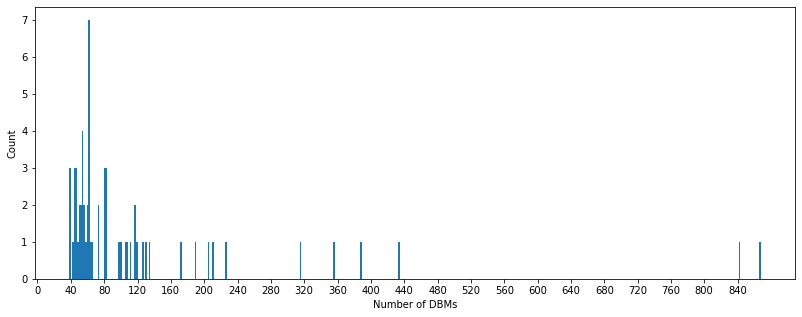

In [ ]:
plt.figure(figsize = (30, 35))
plt.subplot(6, 2, 1)
plt.hist(num_bbox_list_more_or_equal_38, bins=435)
plt.xlabel("Number of DBMs")
plt.ylabel("Count")
plt.xticks(np.arange(0, 870, 40))
plt.show()